In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Prediksi diabetes menggunakan random forest

## Business Understanding

- Masalah: Deteksi dini penyakit diabetes sering terlambat.
- Tujuan: Memprediksi risiko diabetes dari data medis.
- User: Tenaga medis, rumah sakit.
- Manfaat: Mempercepat proses diagnosis awal menggunakan AI.

3. Data Understanding

In [ ]:
dataset = '/content/drive/MyDrive/Prak AI/dataset/diabetes.csv'

In [ ]:
df = pd.read_csv(dataset)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


4. Exploratory Data Analysis (EDA)

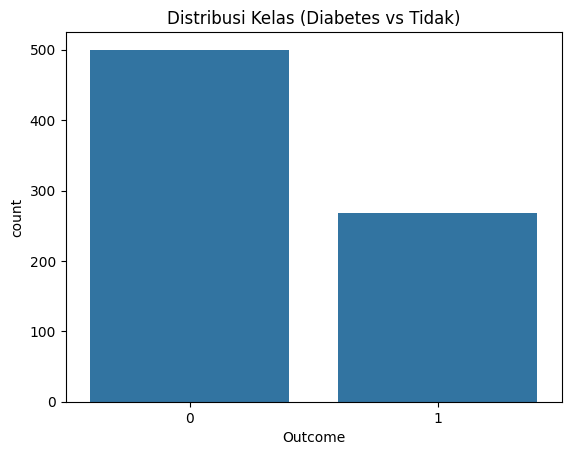

In [ ]:
# Cek distribusi target
sns.countplot(x='Outcome', data=df)
plt.title("Distribusi Kelas (Diabetes vs Tidak)")
plt.show()

In [ ]:
correlation_matrix = df.corr()

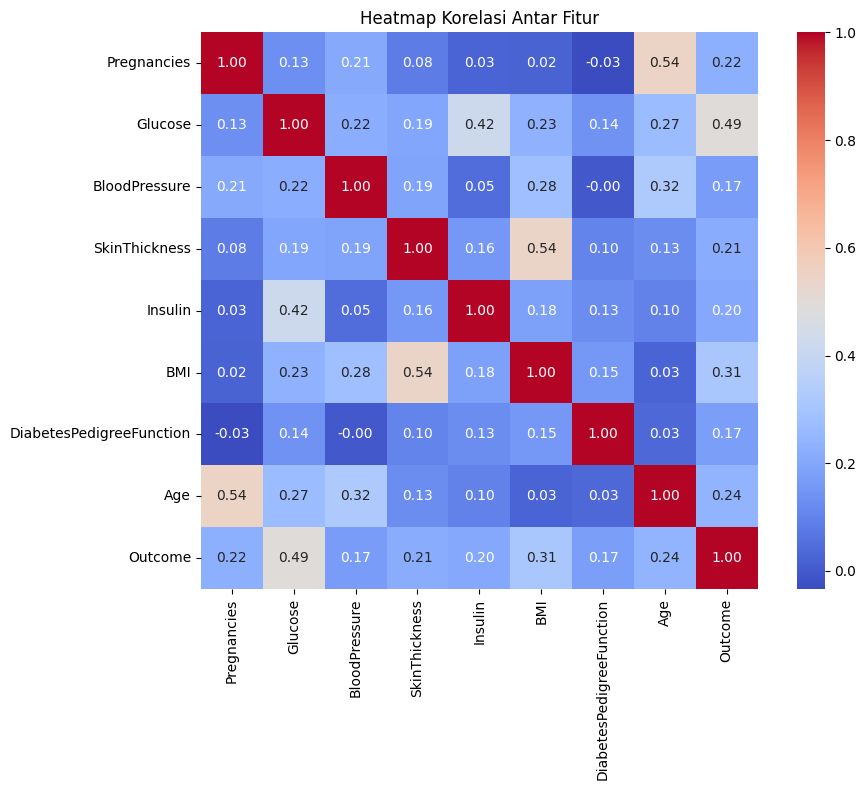

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Heatmap Korelasi Antar Fitur")
plt.tight_layout()
plt.show()

In [ ]:
# Statistik deskriptif
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


 5. Data Preparation

In [ ]:
# Ganti nilai 0 menjadi NaN pada kolom yang tidak logis bernilai 0
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

In [ ]:
# Imputasi dengan median
df.fillna(df.median(), inplace=True)

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

6. Modeling

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

7. Evaluation

Akurasi: 0.7402597402597403
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



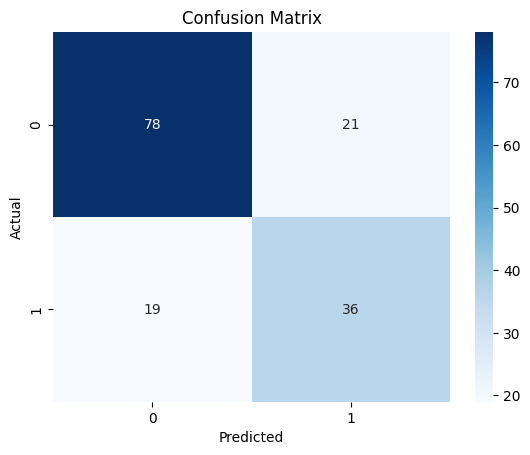

In [ ]:
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

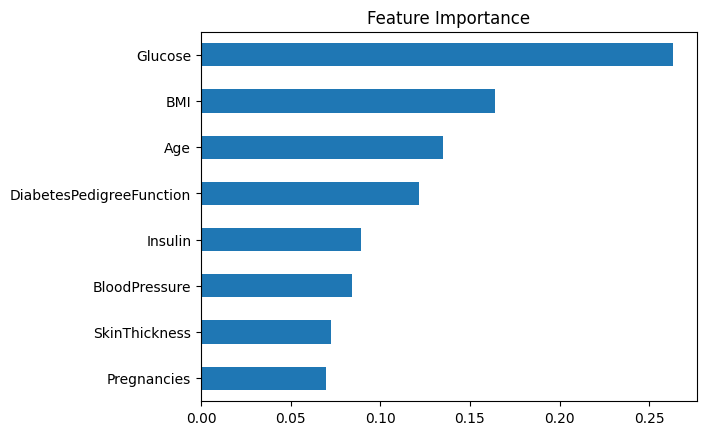

In [ ]:
feat_importance = pd.Series(model.feature_importances_, index=df.columns[:-1])
feat_importance.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()